# Random Generator from Scratch

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

## Uniform Random Generator


In [6]:
def pseudo_uniform(low=0, high=1, seed=123456789, size=1):
    """Generates uniformly random number between 'low' and 'high' limits"""
    def pseudo_uniform_helper(mult=16807, mod=(2**31) - 1, seed=123456789, size=1):
        """Generating a random variable that follows a uniform distribution"""
        U = np.zeros(size)
        x = (seed*mult+1)%mod
        U[0] = x/mod
        for i in range(1, size):
            x = (x*mult+1)%mod
            U[i] = x/mod
        return U
    return low+(high-low)*pseudo_uniform_helper(seed=seed, size=size)

In [9]:
l = pseudo_uniform(low=-5, high=7, size=10000)


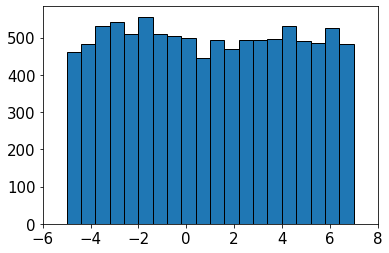

In [10]:
plt.hist(l, bins=20, edgecolor="k")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(-6, 8)
plt.show()

### Sample Picker using uniform random generator

In [16]:
def sample_pick(array):
    """
    Picks up a random sample from a given list"""
    t = time.perf_counter()
    seed = int(10**9*float(str(t-int(t))[0:]))
    l = len(array)
    s = pseudo_uniform(low=0, high=l, seed=seed, size=1)
    idx = int(s)
    return (array[idx])

In [17]:
dice_faces = ["one", "two", "three", "four", "five", "six"]

In [24]:
sample_pick(dice_faces)

'one'

## Bernoulli Distribution

In [25]:
def pseudo_bernoulli(p=0.5, size=1):
    """Bernoulli generator from uniform generator"""
    t = time.perf_counter()
    seed = int(10**9*float(str(t-int(t))[0:]))
    B = pseudo_uniform(seed=seed, size=size)
    B = (B <= p).astype(int)
    return B

In [28]:
B = pseudo_bernoulli(p=0.8, size=10000)


(array([2047.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 7953.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

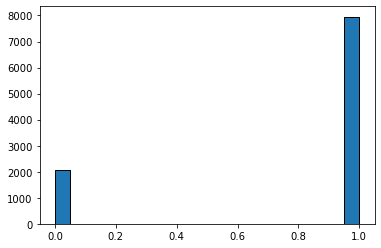

In [29]:
plt.hist(B, bins=20, edgecolor="k")


## Binomial Distribution

In [36]:
t = time.perf_counter()


In [39]:
float(str(t - int(t)))

0.7257648920058273

In [40]:
def pseudo_binomial(n=100, p=0.5, size=1):
    """Implement binomial distribution from the Uniform generator"""
    binom = []
    for _ in range(size):
        t = time.perf_counter()
        seed = int(10**9*float(str(t - int(t))))
        U = pseudo_uniform(size=n, seed=seed)
        Y = (U <= p).astype(int)
        binom.append(np.sum(Y))
    return binom

test_binom = pseudo_binomial(n=100, p=0.75, size=10000)

(array([  13.,   15.,   71.,   76.,  276.,  214.,  825.,  625., 1506.,
         841., 1836.,  809., 1376.,  500.,  650.,  161.,  157.,   27.,
          19.,    3.]),
 array([60. , 61.5, 63. , 64.5, 66. , 67.5, 69. , 70.5, 72. , 73.5, 75. ,
        76.5, 78. , 79.5, 81. , 82.5, 84. , 85.5, 87. , 88.5, 90. ]),
 <BarContainer object of 20 artists>)

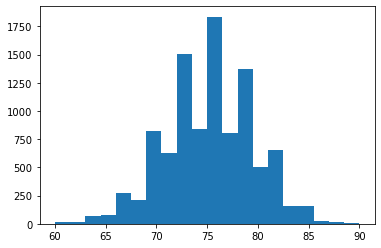

In [42]:
plt.hist(test_binom, bins=20)

## Exponential Distribution

In [43]:
def get_random_seed():
    t = time.perf_counter()
    seed = int(10**9*float(str(t - int(t))))
    return seed

In [48]:
def pseudo_exp(lamb, size=1):
    """ Generates exponential distribution from the Uniform distribution"""
    seed = get_random_seed()
    U = pseudo_uniform(size=size, seed=seed)
    X = -(1 / lamb)*(np.log(1-U))
    return X



(array([3.529e+03, 2.348e+03, 1.456e+03, 9.530e+02, 6.220e+02, 4.010e+02,
        2.250e+02, 1.720e+02, 1.200e+02, 5.900e+01, 4.000e+01, 2.500e+01,
        1.800e+01, 1.600e+01, 3.000e+00, 5.000e+00, 3.000e+00, 4.000e+00,
        0.000e+00, 1.000e+00]),
 array([5.45211098e-04, 4.39730739e+00, 8.79406956e+00, 1.31908317e+01,
        1.75875939e+01, 2.19843561e+01, 2.63811183e+01, 3.07778804e+01,
        3.51746426e+01, 3.95714048e+01, 4.39681670e+01, 4.83649291e+01,
        5.27616913e+01, 5.71584535e+01, 6.15552157e+01, 6.59519778e+01,
        7.03487400e+01, 7.47455022e+01, 7.91422644e+01, 8.35390265e+01,
        8.79357887e+01]),
 <BarContainer object of 20 artists>)

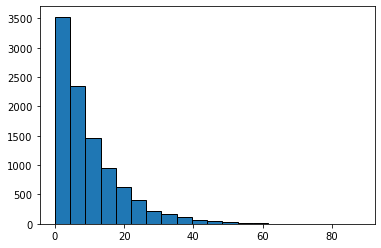

In [50]:
exp = pseudo_exp(0.1, 10000)
plt.hist(exp, bins=20, edgecolor="k")

### Normal Distribution

In [51]:
def pseudo_normal(mu=0.0, sigma=1.0, size=1):
    """Generates normal distribution form the Uniform distribution using Box-Muller transform"""
    seed1 = get_random_seed()
    U1 = pseudo_uniform(seed=seed1, size=size)
    seed2 = get_random_seed()
    U2 = pseudo_uniform(seed=seed2, size=size)
    Z0 = np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*U2)
    Z1 = np.sqrt(-2*np.log(U1))*np.sin(2*np.pi*U2)
    Z0 = Z0*sigma+mu
    return Z0

In [52]:
mu0_sigma1 = pseudo_normal(size=1000)
mu3_sigma2 = pseudo_normal(mu=-3., sigma=2., size=1000)
mu3_sigmahalf = pseudo_normal(mu=3, sigma=.5, size=1000)


(array([  2.,   3.,   8.,   8.,  44.,  57.,  89.,  95., 117., 130., 128.,
         96.,  71.,  59.,  39.,  24.,  17.,   8.,   4.,   1.]),
 array([1.4836352 , 1.64021828, 1.79680137, 1.95338445, 2.10996753,
        2.26655061, 2.4231337 , 2.57971678, 2.73629986, 2.89288294,
        3.04946603, 3.20604911, 3.36263219, 3.51921528, 3.67579836,
        3.83238144, 3.98896452, 4.14554761, 4.30213069, 4.45871377,
        4.61529685]),
 <BarContainer object of 20 artists>)

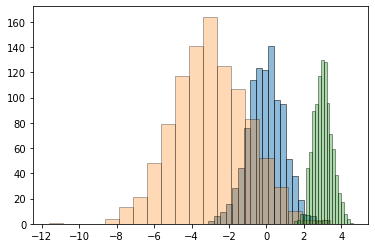

In [57]:
plt.hist(mu0_sigma1, bins=20, alpha=0.5, edgecolor="k")
plt.hist(mu3_sigma2, bins=20, alpha=0.3, edgecolor="k")
plt.hist(mu3_sigmahalf, bins=20, alpha=0.4, edgecolor="k")